In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn.metrics as ev

In [2]:
import os
os.listdir('../data/BERT')

['200', 'X_test.csv', 'X_train.csv', 'y_test.csv', 'y_train.csv']

In [143]:
X = pd.read_csv("../data/BERT/X_train.csv").to_numpy()
print(f"shape of X = {X.shape}")
Y = pd.read_csv("../data/BERT/Y_train.csv")["AntiVax"].to_numpy().reshape(X.shape[0],1)
print(f"shape of Y = {Y.shape}")
theta = np.random.rand(X.shape[1], 1)
print(f"shape of theta = {theta.shape}")

shape of X = (3673, 769)
shape of Y = (3673, 1)
shape of theta = (769, 1)


In [88]:
X = np.array([[1,  2.2874e+00,    8.9081e-01],
   [1,  2.4717e+00,   -6.8611e-01],
   [1,  3.8360e-01,   -1.6322e+00],
   [1, -2.0572e+00,   -1.0777e+00],
   [1, -2.6066e+00,    4.6768e-01],
   [1, -7.5953e-01,    1.5831e+00],
   [1,  1.7859e+00,    1.2430e+00],
   [1,  2.6894e+00,   -2.3989e-01],
   [1,  1.1203e+00,   -1.5022e+00],
   [1, -1.4788e+00,   -1.3834e+00],
   [1, -2.7183e+00,    7.2967e-03],
   [1, -1.4586e+00,    1.3913e+00],
   [1,  1.1421e+00,    1.4961e+00],
   [1,  2.6927e+00,    2.2544e-01],
   [1,  1.7677e+00,   -1.2525e+00],
   [1, -7.8260e-01,   -1.5789e+00],
   [1, -2.6133e+00,   -4.5367e-01],
   [1, -2.0414e+00,    1.0887e+00],
   [1,  4.0741e-01,    1.6301e+00],
   [1,  2.4816e+00,    6.7281e-01]])

Y = np.array([[0], 
              [0], 
              [1], 
              [0], 
              [0], 
              [1], 
              [1], 
              [0], 
              [1], 
              [0], 
              [0], 
              [0], 
              [1], 
              [0], 
              [1], 
              [1], 
              [0], 
              [0], 
              [1], 
              [0]])

theta = np.array([[0.25],
                  [0.50],
                  [-0.50]])

In [59]:
def g(x):
    # if np.any(1 + np.exp(-x)) ==0:
    #     print(x)
    return 1 / (1 + np.exp(-x))

def h(x, theta):
    return g(x@theta)

def J(theta, X, Y):
    return np.mean((Y - 1) * np.log(1 - h(X, theta)) - Y * np.log(h(X, theta)))

In [138]:
(h(X, theta) - Y).shape

(3673, 1)

In [137]:
X.T.shape

(769, 3673)

In [136]:
(X.T @ (h(X, theta) - Y)).shape

(769, 1)

100%|██████████| 36/36 [00:00<00:00, 158.57it/s]


0.6110502591332734

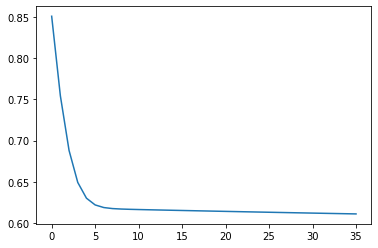

In [201]:
X = pd.read_csv("../data/BERT/X_train.csv").to_numpy()
# print(f"shape of X = {X.shape}")
Y = pd.read_csv("../data/BERT/Y_train.csv")["AntiVax"].to_numpy().reshape(X.shape[0],1)
# print(f"shape of Y = {Y.shape}")
theta = np.random.rand(X.shape[1], 1)
# print(f"shape of theta = {theta.shape}")

# Do Gradient Descent and get optimum theta
Js = []
alpha = 0.01/len(X)
for i in tqdm(range(int(0.0001/alpha))):
    Js.append(J(theta, X, Y))
    slope = (X.T @ (h(X, theta) - Y))
    theta = theta - alpha * slope
plt.plot(np.arange(0, len(Js)), Js)
Js[-1]

In [135]:
theta.shape

(769, 1)

In [162]:
(np.arange(-10, 10, 0.1)).shape

(200,)

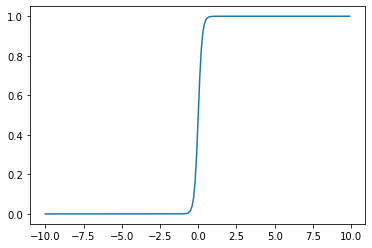

In [167]:
x = np.arange(-10, 10, 0.1).reshape(200, 1)
f = h(x, np.array([8]))
plt.plot(x, f)

In [171]:
theta.shape

(769, 1)

In [188]:
X_test = pd.read_csv("../data/BERT/X_test.csv").to_numpy()
print(f"shape of X_test = {X_test.shape}")
Y_test = pd.read_csv("../data/BERT/Y_test.csv")["AntiVax"].to_numpy().reshape(X_test.shape[0],1)
print(f"shape of Y_test = {Y_test.shape}")

shape of X_test = (919, 769)
shape of Y_test = (919, 1)


In [202]:
def predict(threshold = 0.5):
    return (h(X_test, theta) > threshold).astype(int)

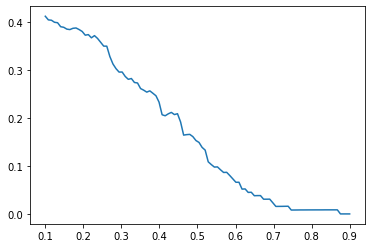

In [203]:
x_p = np.linspace(0.1, 0.9, 100)
s = []
for i in x_p:
    s.append(ev.f1_score(Y_test, predict(i)))

plt.plot(x_p, s)

In [187]:
predict(0.5).shape

(919, 1)